### Step 1 - Data Engineering

In [5]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

In [8]:
# The climate data for Hawaii is provided through two CSV files. Start by using Python 
# and Pandas to inspect the content of these files and clean the data.

hm = pd.read_csv('Resources/hawaii_measurements.csv')
hs = pd.read_csv('Resources/hawaii_stations.csv')

In [9]:
hm.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [10]:
hs

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [11]:
hm_clean = hm.dropna()

In [12]:
hm_clean.count()

station    18103
date       18103
prcp       18103
tobs       18103
dtype: int64

In [13]:
hm_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18103 entries, 0 to 19549
Data columns (total 4 columns):
station    18103 non-null object
date       18103 non-null object
prcp       18103 non-null float64
tobs       18103 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 707.1+ KB


In [14]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), object(2)
memory usage: 440.0+ bytes


### Step 2 - Database Engineering  (Reflect Tables into SQLAlchemy ORM)

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [17]:
hs.columns

Index(['station', 'name', 'latitude', 'longitude', 'elevation'], dtype='object')

In [18]:
# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 

In [19]:
# Sets an object to utilize the default declarative base in SQL Alchemy
Base = declarative_base()


# Creates Classes which will serve as the anchor points for our Tables
class Station(Base):
    __tablename__ = 'stations'
    station = Column(String(255), primary_key=True)
    name = Column(String(255))
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)
    
class Measurement(Base):
    __tablename__ = 'measurements'
    station = Column(String(255), primary_key=True)
    date = Column(String(255))
    prcp = Column(Float) 
    tobs = Column(Float)

In [20]:
Base.metadata.create_all(engine)

In [21]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [22]:
hs.to_sql("stations", conn, index=False, if_exists='replace')

In [23]:
hm_clean.to_sql("measurements", conn, index=False, if_exists='replace')

### Step 3 - Climate Analysis and Exploration

In [24]:
# select station, name from stations;
results = session.query(Station.station, Station.name)

stations = []
names = []
for station, name in results:
    stations.append(station)
    names.append(name)

In [25]:
names

['WAIKIKI 717.2, HI US',
 'KANEOHE 838.1, HI US',
 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'PEARL CITY, HI US',
 'UPPER WAHIAWA 874.3, HI US',
 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'WAIHEE 837.5, HI US',
 'HONOLULU OBSERVATORY 702.2, HI US',
 'MANOA LYON ARBO 785.2, HI US']

In [26]:
engine.execute("SELECT * FROM stations").fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [27]:
hm_clean.columns

Index(['station', 'date', 'prcp', 'tobs'], dtype='object')

In [28]:
import datetime as dt

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for row in results:
    print(row)

2017-08-23


In [30]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [54]:
# perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(dt.date(2016, 8, 23), dt.date(2017, 8, 23)))

dates = []
rain = []
for date, prcp in results:
    dates.append(date)
    rain.append(prcp)

df = pd.DataFrame({"dates": dates,
                   "Prcp": rain
    
})

df

,Prcp,dates
0,0.00,2016-08-23
1,0.08,2016-08-24
2,0.08,2016-08-25
3,0.00,2016-08-26
4,0.00,2016-08-27
5,0.01,2016-08-28
6,0.00,2016-08-29
7,0.00,2016-08-30
8,0.13,2016-08-31
9,0.00,2016-09-01


In [71]:
# Sort the dataframe by date
new = df.sort_values("dates")
new.reset_index()

,index,Prcp,dates
0,0,0.00,2016-08-23
1,1027,0.02,2016-08-23
2,702,0.05,2016-08-23
3,1693,0.70,2016-08-23
4,359,0.15,2016-08-23
5,1341,1.79,2016-08-23
6,1028,1.22,2016-08-24
7,1,0.08,2016-08-24
8,1342,2.15,2016-08-24
9,360,2.15,2016-08-24


In [ ]:
# #read data from csv
# data = pd.read_csv('data.csv', usecols=['date','count'], parse_dates=['date'])
# #set date as index
# data.set_index('date',inplace=True)

# #plot data
# fig, ax = plt.subplots(figsize=(15,7))
# data.plot(ax=ax)

# #set ticks every week
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# #set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

<IPython.core.display.Javascript object>


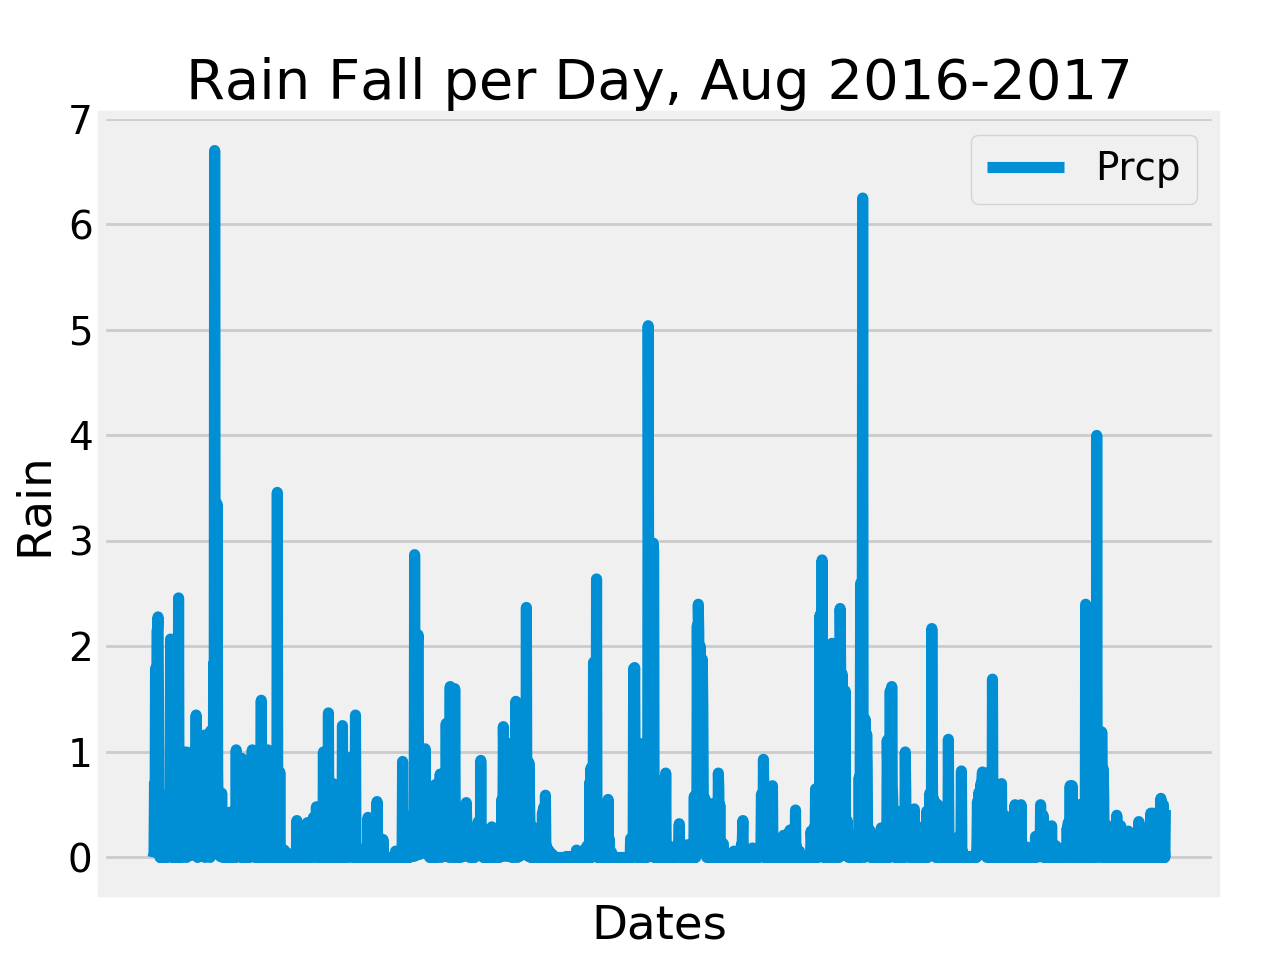

Text(0,0.5,'Rain')

In [78]:
#set date as index
# new.set_index("dates", drop=False)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
# ax.bar(new["dates"], new["Prcp"])
new.plot(ax=ax)


# Rotate the xticks for the dates
#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax.set_title('Rain Fall per Day, Aug 2016-2017')
ax.set_xlabel('Dates')
ax.set_ylabel('Rain')

In [51]:
# Calculate the date 1 year ago from today
print("Today's Date is:", dt.date.today())
query_date = dt.date.today() - dt.timedelta(days=365)
print("One year ago today is:", query_date)


Today's Date is: 2018-07-05
One year ago today is: 2017-07-05


# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


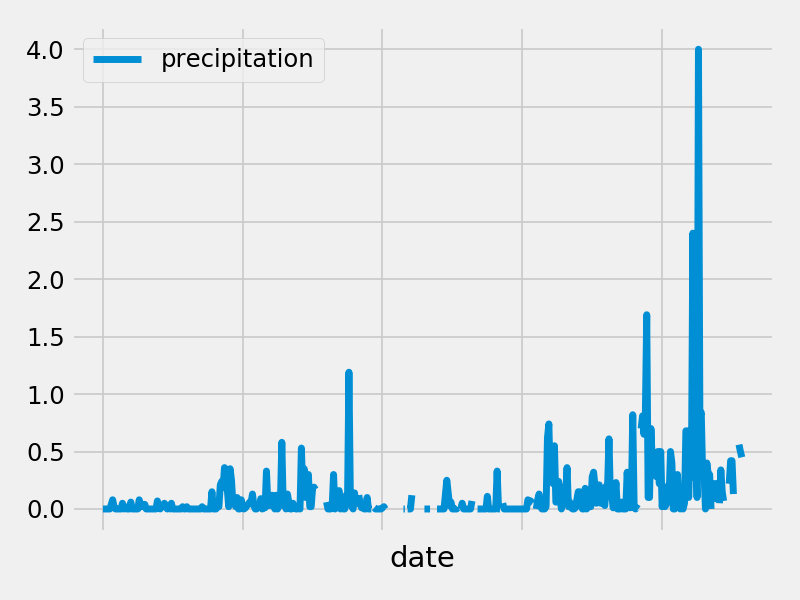

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


,precipitation
count,412.000000
mean,0.117549
std,0.294210
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [12]:
# How many stations are available in this dataset?


[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


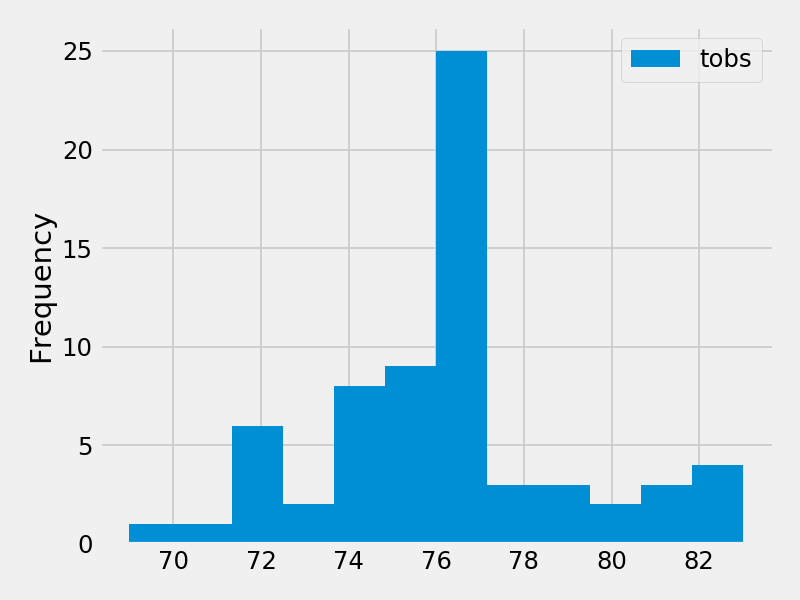

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


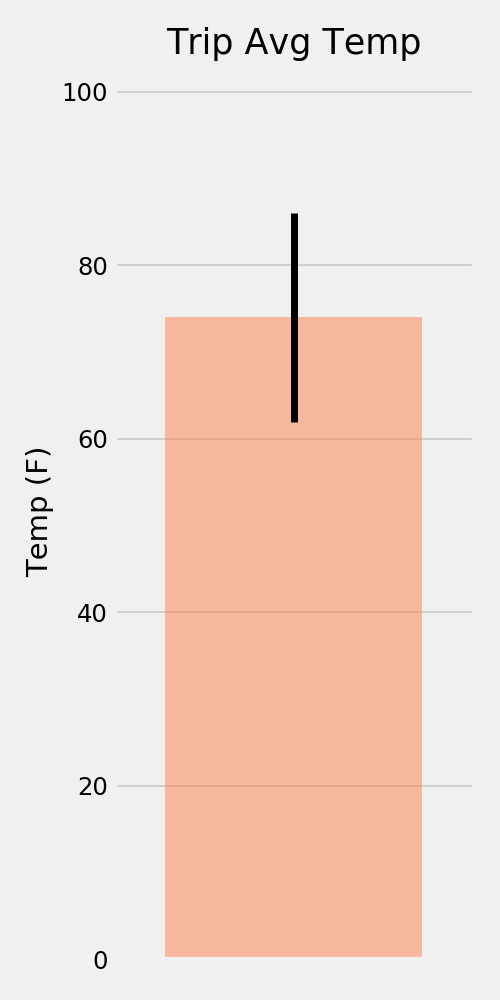

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


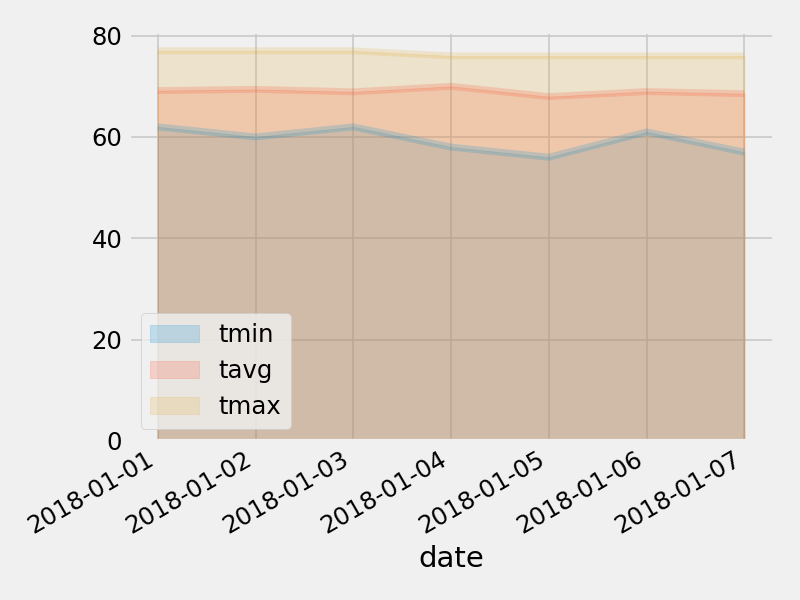

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
